## data preparation

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pyinterpolate import reproject_flat, ExperimentalVariogram, build_theoretical_variogram, TheoreticalVariogram

In [2]:
DEM_FILE = './data/.csv'
OIL_FILE = './data/oilcont.csv'

In [3]:
df = pd.read_csv(OIL_FILE)
df.head()

r_df = df[["log_kwges","longitude","latitude"]]

In [4]:
#r_df = reproject_flat(
#    ds=df,
#    in_crs=4326,
#    out_crs=2180,
#    lon_col='longitude',
#    lat_col='latitude'
#)

In [5]:
r_df.head()

,log_kwges,longitude,latitude
0,3.0394,13821.74,183794.26
1,2.7067,13799.26,183775.21
2,1.9685,13745.76,183786.58
3,0.0000,13835.24,183791.99
4,1.3979,13801.18,183708.70


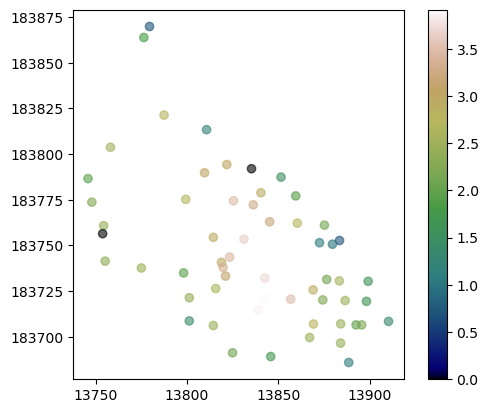

In [6]:
oil_geometry = gpd.points_from_xy(x=r_df['longitude'], y=r_df['latitude'], crs=31255)
oil = gpd.GeoDataFrame(r_df, geometry=oil_geometry)

oil.plot(column='log_kwges', cmap='gist_earth', alpha=0.6, vmin=0, legend=True);

## Experimental Variogram

In [7]:
#step_size = 1000  # meters - remember, that this parameter is related to projection!
#max_range = 20000  # meters - remember, that this parameter is related to projection!

step_size = 5  # meters - remember, that this parameter is related to projection!
max_range = 215  # meters - remember, that this parameter is related to projection!

is_semivariance = True
is_covariance = True

ds = oil[['longitude', 'latitude', 'log_kwges']].to_numpy()

In [8]:
experimental_variogram = ExperimentalVariogram(
    ds=ds,
    step_size=step_size,
    max_range=max_range,
    is_semivariance=is_semivariance,
    is_covariance=is_covariance
)

In [9]:
print(experimental_variogram)

+-------+---------------------+------------------------+
|  lag  |     semivariance    |       covariance       |
+-------+---------------------+------------------------+
|  5.0  |     0.622672034     |   0.6295511404000003   |
|  10.0 | 0.17355956749999996 |   0.5337632335586714   |
|  15.0 |  0.3883910043023257 |   0.2510271834707951   |
|  20.0 | 0.45762879174418597 |   0.2913454929948612   |
|  25.0 |  0.5684247683898306 |  0.10867831325122186   |
|  30.0 |  0.6171196726865671 |  0.09524426637112972   |
|  35.0 |  0.707139036388889  |  0.16374992638117275   |
|  40.0 |  0.8785738797457628 |  -0.06935210285334413  |
|  45.0 |  0.8706710556321839 |  -0.12993282064341066  |
|  50.0 |  1.0428712425641027 |  -0.0671077061390518   |
|  55.0 |  0.9376642917763158 |  -0.20321808357383975  |
|  60.0 |   1.0829456998125   |  -0.25102398380664054  |
|  65.0 |  0.7636252011363638 |  -0.02978000256327444  |
|  70.0 |  0.871041788095238  |  -0.07486193823696266  |
|  75.0 |  1.0678965684337351 |

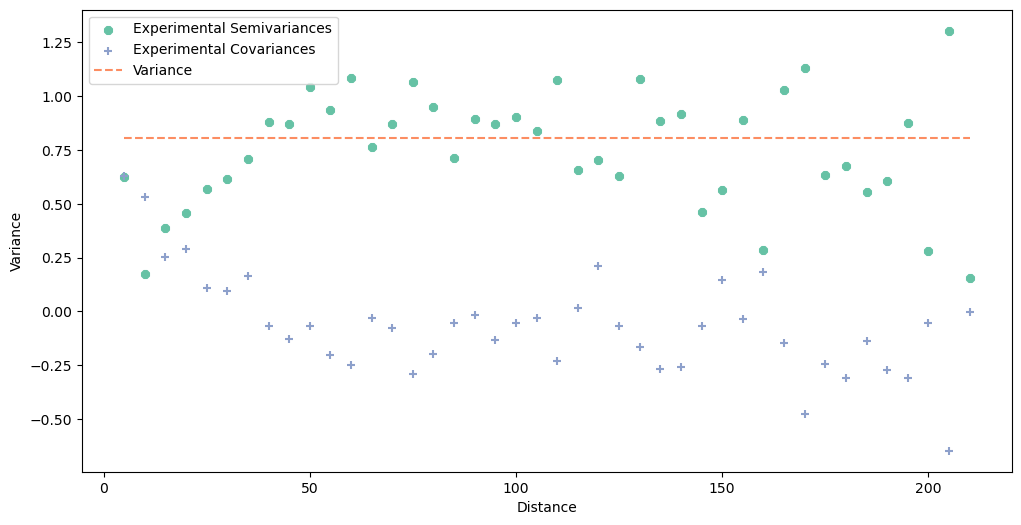

In [10]:
experimental_variogram.plot(
    semivariance=True,
    covariance=True,
    variance=True
)

## Theoretical Variogram

In [11]:
sill = experimental_variogram.variance
nugget = 0
variogram_range = 215

In [12]:
# circular

circular_model = build_theoretical_variogram(experimental_variogram=experimental_variogram,
                                             models_group='circular',
                                             sill=sill,
                                             rang=variogram_range,
                                             nugget=nugget)

In [13]:
print(circular_model)

* Selected model: Circular model
* Nugget: 0
* Sill: 0.8043478610493461
* Range: 215
* Spatial Dependency Strength is Undefined: nugget equal to 0, cannot estimate
* Mean Bias: None
* Mean RMSE: 0.450795651026839
* Error-lag weighting method: equal


+-------+---------------------+---------------------+----------------------+
|  lag  |     theoretical     |     experimental    |   bias (real-yhat)   |
+-------+---------------------+---------------------+----------------------+
|  5.0  | 0.02381477170424155 |     0.622672034     |  0.5988572622957585  |
|  10.0 |  0.0476166572065996 | 0.17355956749999996 | 0.12594291029340035  |
|  15.0 | 0.07139274934915817 |  0.3883910043023257 |  0.3169982549531675  |
|  20.0 | 0.09513009889104361 | 0.45762879174418597 | 0.36249869285314235  |
|  25.0 | 0.11881569303645215 |  0.5684247683898306 | 0.44960907535337846  |
|  30.0 | 0.14243643343682896 |  0.6171196726865671 |  0.4746832392497381  |
|  35.0 | 0.16597911347615005 |  0.707139036388889  |  0

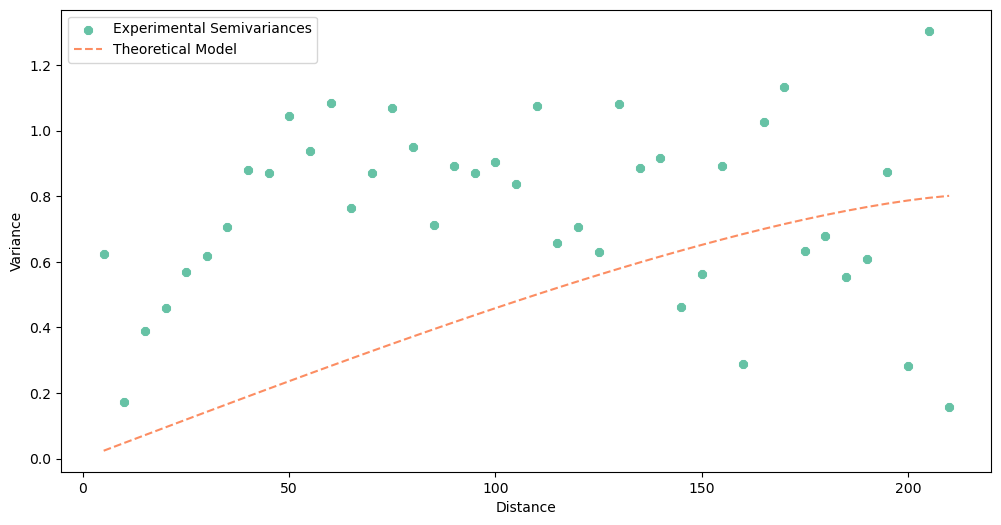

In [14]:
circular_model.plot()

In [15]:
# cubic

cubic_model = build_theoretical_variogram(experimental_variogram=experimental_variogram,
                                          models_group='cubic',
                                          sill=sill,
                                          rang=variogram_range,
                                          nugget=nugget)

In [16]:
print(cubic_model)

* Selected model: Cubic model
* Nugget: 0
* Sill: 0.8043478610493461
* Range: 215
* Spatial Dependency Strength is Undefined: nugget equal to 0, cannot estimate
* Mean Bias: None
* Mean RMSE: 0.43809843312004293
* Error-lag weighting method: equal


+-------+-----------------------+---------------------+----------------------+
|  lag  |      theoretical      |     experimental    |   bias (real-yhat)   |
+-------+-----------------------+---------------------+----------------------+
|  5.0  | 0.0029566224958484234 |     0.622672034     |  0.6197154115041517  |
|  10.0 |  0.011472941676007849 | 0.17355956749999996 |  0.1620866258239921  |
|  15.0 |  0.02502069968833414  |  0.3883910043023257 | 0.36337030461399156  |
|  20.0 |  0.04307621604765326  | 0.45762879174418597 |  0.4145525756965327  |
|  25.0 |  0.06512264835542425  |  0.5684247683898306 |  0.5033021200344063  |
|  30.0 |   0.0906522194628156  |  0.6171196726865671 |  0.5264674532237514  |
|  35.0 |  0.11916839989166633  |  0.70

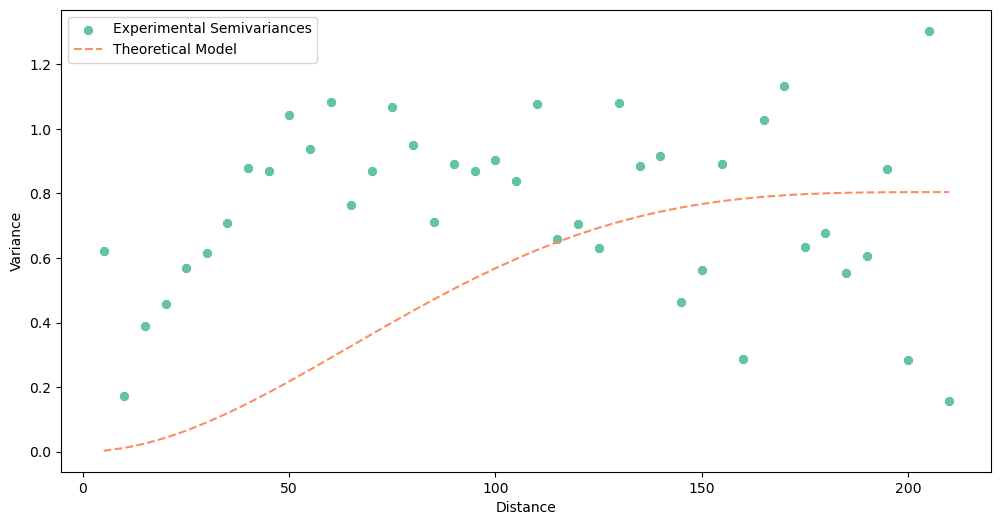

In [17]:
cubic_model.plot()

In [18]:
# Exponential model

exponential_model = build_theoretical_variogram(experimental_variogram=experimental_variogram,
                                                models_group='exponential',
                                                sill=sill,
                                                rang=variogram_range,
                                                nugget=nugget)
print(exponential_model)

* Selected model: Exponential model
* Nugget: 0
* Sill: 0.8043478610493461
* Range: 215
* Spatial Dependency Strength is Undefined: nugget equal to 0, cannot estimate
* Mean Bias: None
* Mean RMSE: 0.5406561465841399
* Error-lag weighting method: equal


+-------+----------------------+---------------------+----------------------+
|  lag  |     theoretical      |     experimental    |   bias (real-yhat)   |
+-------+----------------------+---------------------+----------------------+
|  5.0  | 0.018489931682101248 |     0.622672034     |  0.6041821023178988  |
|  10.0 | 0.03655482639927192  | 0.17355956749999996 | 0.13700474110072802  |
|  15.0 | 0.05420445468093666  |  0.3883910043023257 | 0.33418654962138905  |
|  20.0 | 0.07144836245665422  | 0.45762879174418597 | 0.38618042928753177  |
|  25.0 |  0.088295876219103   |  0.5684247683898306 |  0.4801288921707276  |
|  30.0 | 0.10475610806838243  |  0.6171196726865671 |  0.5123635646181847  |
|  35.0 | 0.12083796064035801  |  0.7071390

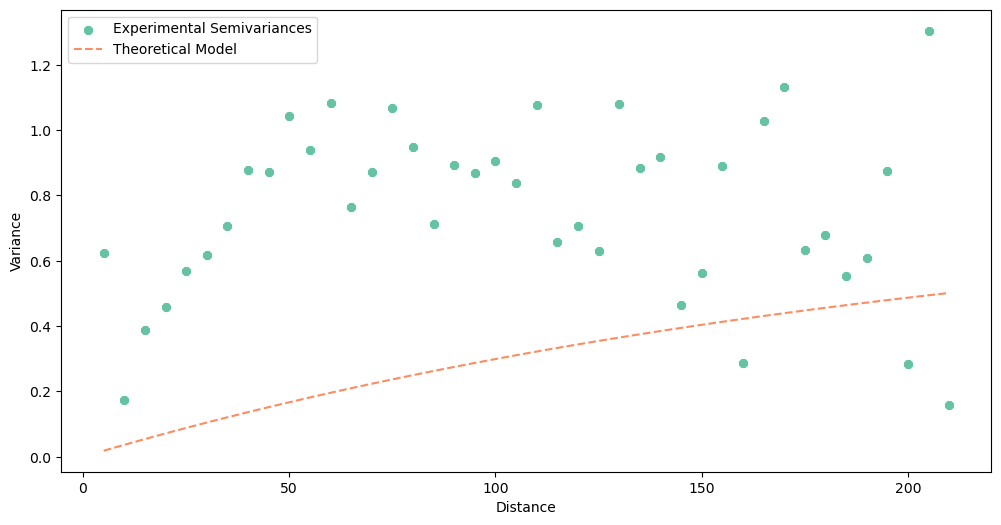

In [19]:
exponential_model.plot()

In [20]:
# Gaussian model

gaussian_model = build_theoretical_variogram(experimental_variogram=experimental_variogram,
                                             models_group='gaussian',
                                             sill=sill,
                                             rang=variogram_range,
                                             nugget=nugget)
print(gaussian_model)

* Selected model: Gaussian model
* Nugget: 0
* Sill: 0.8043478610493461
* Range: 215
* Spatial Dependency Strength is Undefined: nugget equal to 0, cannot estimate
* Mean Bias: None
* Mean RMSE: 0.6349105383528191
* Error-lag weighting method: equal


+-------+-----------------------+---------------------+----------------------+
|  lag  |      theoretical      |     experimental    |   bias (real-yhat)   |
+-------+-----------------------+---------------------+----------------------+
|  5.0  | 0.0004349001575823931 |     0.622672034     |  0.6222371338424176  |
|  10.0 | 0.0017381902705403678 | 0.17355956749999996 |  0.1718213772294596  |
|  15.0 |  0.003905646879638283 |  0.3883910043023257 |  0.3844853574226874  |
|  20.0 | 0.0069302562289712995 | 0.45762879174418597 | 0.45069853551521466  |
|  25.0 |  0.010802252079090417 |  0.5684247683898306 |  0.5576225163107401  |
|  30.0 |  0.015509168245172728 |  0.6171196726865671 |  0.6016105044413944  |
|  35.0 |  0.021035905464695814 |  0.

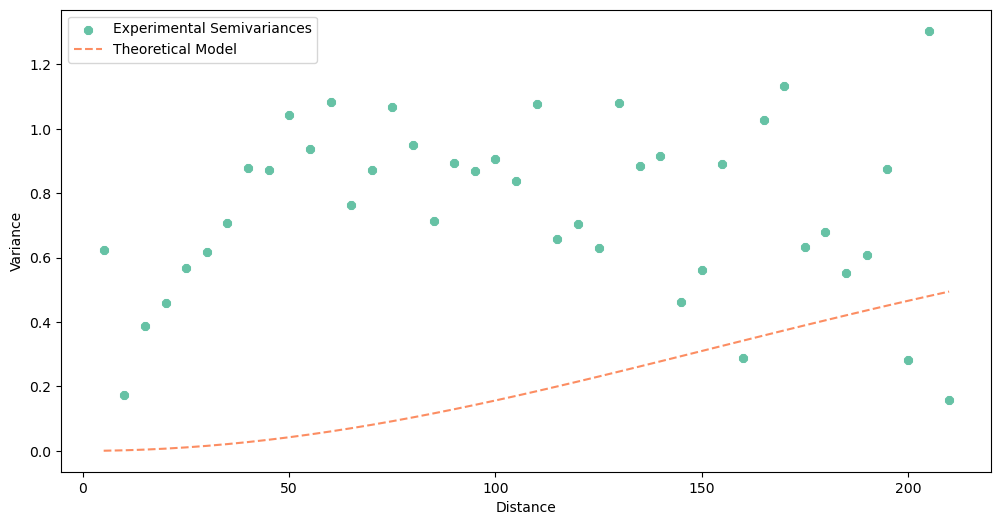

In [21]:
gaussian_model.plot()

In [22]:
# Linear model

linear_model = build_theoretical_variogram(experimental_variogram=experimental_variogram,
                                           models_group='linear',
                                           sill=sill,
                                           rang=variogram_range,
                                           nugget=nugget)
print(linear_model)

* Selected model: Linear model
* Nugget: 0
* Sill: 0.8043478610493461
* Range: 215
* Spatial Dependency Strength is Undefined: nugget equal to 0, cannot estimate
* Mean Bias: None
* Mean RMSE: 0.4923057097759743
* Error-lag weighting method: equal


+-------+----------------------+---------------------+-----------------------+
|  lag  |     theoretical      |     experimental    |    bias (real-yhat)   |
+-------+----------------------+---------------------+-----------------------+
|  5.0  | 0.018705764210449907 |     0.622672034     |   0.6039662697895501  |
|  10.0 | 0.037411528420899814 | 0.17355956749999996 |  0.13614803907910014  |
|  15.0 | 0.05611729263134973  |  0.3883910043023257 |  0.33227371167097597  |
|  20.0 | 0.07482305684179963  | 0.45762879174418597 |  0.38280573490238634  |
|  25.0 | 0.09352882105224954  |  0.5684247683898306 |  0.47489594733758106  |
|  30.0 | 0.11223458526269946  |  0.6171196726865671 |   0.5048850874238676  |
|  35.0 | 0.13094034947314936  |  0.707

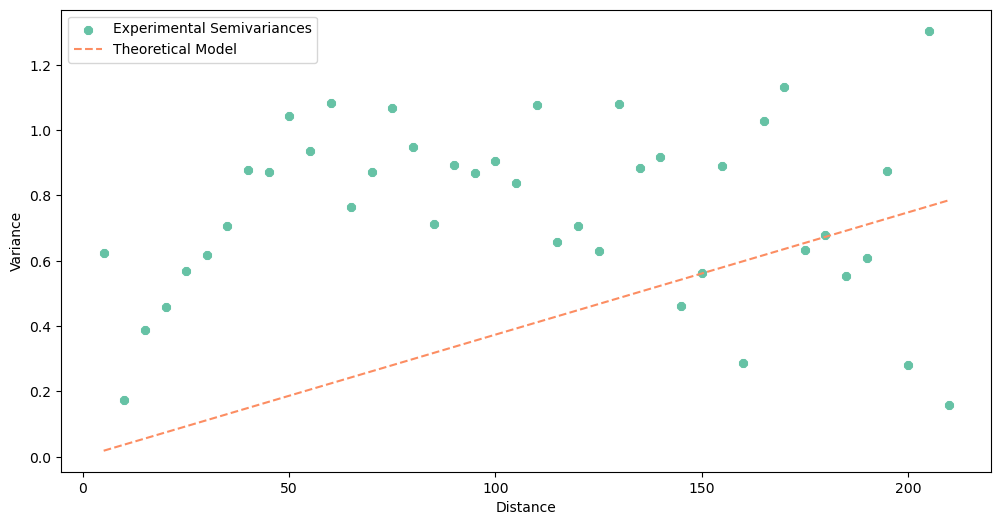

In [23]:
linear_model.plot()

In [24]:
# Power model

power_model = build_theoretical_variogram(experimental_variogram=experimental_variogram,
                                          models_group='power',
                                          sill=sill,
                                          rang=variogram_range,
                                          nugget=nugget)
print(power_model)

* Selected model: Power model
* Nugget: 0
* Sill: 0.8043478610493461
* Range: 215
* Spatial Dependency Strength is Undefined: nugget equal to 0, cannot estimate
* Mean Bias: None
* Mean RMSE: 0.6120378491032096
* Error-lag weighting method: equal


+-------+------------------------+---------------------+-----------------------+
|  lag  |      theoretical       |     experimental    |    bias (real-yhat)   |
+-------+------------------------+---------------------+-----------------------+
|  5.0  | 0.00043501777233604435 |     0.622672034     |   0.622237016227664   |
|  10.0 | 0.0017400710893441774  | 0.17355956749999996 |  0.17181949641065578  |
|  15.0 | 0.0039151599510243995  |  0.3883910043023257 |  0.38447584435130133  |
|  20.0 | 0.0069602843573767096  | 0.45762879174418597 |  0.45066850738680925  |
|  25.0 |  0.01087544430840111   |  0.5684247683898306 |   0.5575493240814294  |
|  30.0 |  0.015660639804097598  |  0.6171196726865671 |   0.6014590328824695  |
|  35.0 |  0.021315870

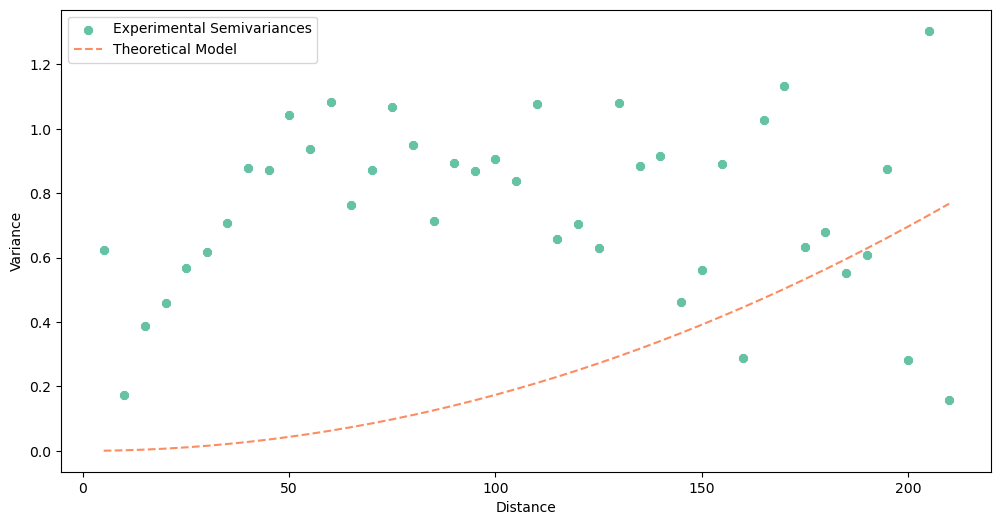

In [25]:
power_model.plot()

In [26]:
# Spherical model

spherical_model = build_theoretical_variogram(experimental_variogram=experimental_variogram,
                                              models_group='spherical',
                                              sill=sill,
                                              rang=variogram_range,
                                              nugget=nugget)

print(spherical_model)

* Selected model: Spherical model
* Nugget: 0
* Sill: 0.8043478610493461
* Range: 215
* Spatial Dependency Strength is Undefined: nugget equal to 0, cannot estimate
* Mean Bias: None
* Mean RMSE: 0.42272959174267516
* Error-lag weighting method: equal


+-------+----------------------+---------------------+----------------------+
|  lag  |     theoretical      |     experimental    |   bias (real-yhat)   |
+-------+----------------------+---------------------+----------------------+
|  5.0  | 0.028053587969484907 |     0.622672034     |  0.5946184460305152  |
|  10.0 |  0.0560768258618301  | 0.17355956749999996 | 0.11748274163816985  |
|  15.0 | 0.08403936359989583  |  0.3883910043023257 | 0.30435164070242987  |
|  20.0 | 0.11191085110654239  | 0.45762879174418597 |  0.3457179406376436  |
|  25.0 | 0.13966093830463006  |  0.5684247683898306 |  0.4287638300852005  |
|  30.0 |  0.1672592751170191  |  0.6171196726865671 |  0.449860397569548   |
|  35.0 | 0.19467551146656983  |  0.70713903

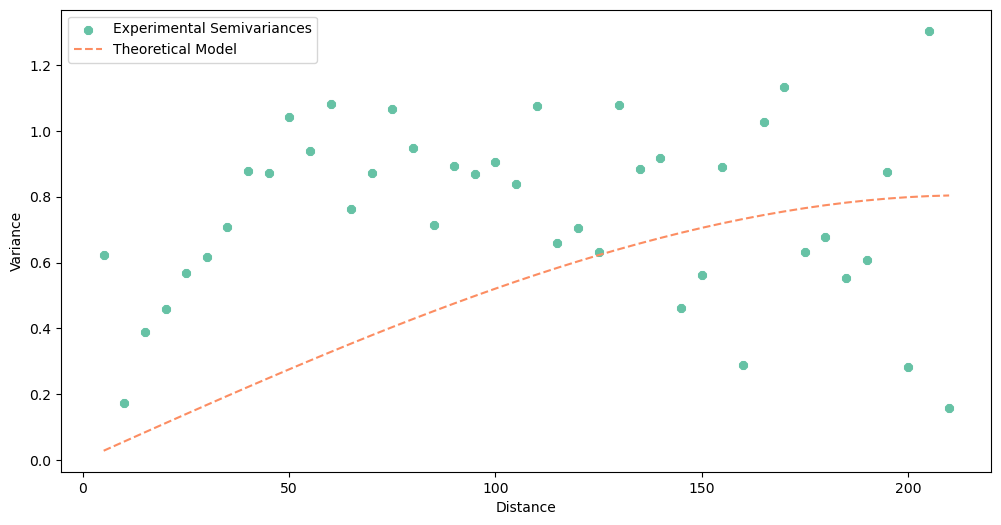

In [27]:
spherical_model.plot()

In [28]:
models = [
    circular_model, cubic_model, exponential_model, gaussian_model, linear_model, power_model, spherical_model
]

lowest_rmse = np.inf
chosen_model = ''

for _model in models:

    # Get attrs
    model_name = _model.name
    model_rmse = _model.rmse

    # Check error
    if model_rmse < lowest_rmse:
        lowest_rmse = model_rmse
        chosen_model = model_name

    # Print status
    msg = f'Model: {model_name}, RMSE: {model_rmse}'
    print(msg)

msg = f'\nThe best model is {chosen_model} with RMSE {lowest_rmse}'
print(msg)

Model: circular, RMSE: 0.450795651026839
Model: cubic, RMSE: 0.43809843312004293
Model: exponential, RMSE: 0.5406561465841399
Model: gaussian, RMSE: 0.6349105383528191
Model: linear, RMSE: 0.4923057097759743
Model: power, RMSE: 0.6120378491032096
Model: spherical, RMSE: 0.42272959174267516

The best model is spherical with RMSE 0.42272959174267516


## Fit semivariogram model automatically

In [29]:
fitted = build_theoretical_variogram(
    experimental_variogram=experimental_variogram,
    models_group='all',
    nugget=0,
    rang=variogram_range,
    sill=sill
)

In [30]:
print(fitted)

* Selected model: Spherical model
* Nugget: 0
* Sill: 0.8043478610493461
* Range: 215
* Spatial Dependency Strength is Undefined: nugget equal to 0, cannot estimate
* Mean Bias: None
* Mean RMSE: 0.42272959174267516
* Error-lag weighting method: equal


+-------+----------------------+---------------------+----------------------+
|  lag  |     theoretical      |     experimental    |   bias (real-yhat)   |
+-------+----------------------+---------------------+----------------------+
|  5.0  | 0.028053587969484907 |     0.622672034     |  0.5946184460305152  |
|  10.0 |  0.0560768258618301  | 0.17355956749999996 | 0.11748274163816985  |
|  15.0 | 0.08403936359989583  |  0.3883910043023257 | 0.30435164070242987  |
|  20.0 | 0.11191085110654239  | 0.45762879174418597 |  0.3457179406376436  |
|  25.0 | 0.13966093830463006  |  0.5684247683898306 |  0.4287638300852005  |
|  30.0 |  0.1672592751170191  |  0.6171196726865671 |  0.449860397569548   |
|  35.0 | 0.19467551146656983  |  0.70713903

In [31]:
fitted = build_theoretical_variogram(experimental_variogram=experimental_variogram)

In [32]:
print(fitted)

* Selected model: Power model
* Nugget: 0.29058028253333335
* Sill: 0.5161604682800001
* Range: 37.827751408310334
* Spatial Dependency Strength is moderate
* Mean Bias: None
* Mean RMSE: 0.23671584115852998
* Error-lag weighting method: equal


+-------+---------------------+---------------------+-----------------------+
|  lag  |     theoretical     |     experimental    |    bias (real-yhat)   |
+-------+---------------------+---------------------+-----------------------+
|  5.0  |  0.2995981468318886 |     0.622672034     |   0.3230738871681114  |
|  10.0 |  0.3266517397275545 | 0.17355956749999996 |  -0.15309217222755456 |
|  15.0 | 0.37174106122033096 |  0.3883910043023257 |  0.016649943081994745 |
|  20.0 |  0.4348661113102179 | 0.45762879174418597 |  0.022762680433968063 |
|  25.0 |  0.5160268899972156 |  0.5684247683898306 |  0.052397878392615005 |
|  30.0 |  0.6152233972813237 |  0.6171196726865671 | 0.0018962754052433972 |
|  35.0 |  0.7324556331625425 |  0.707139036388889  

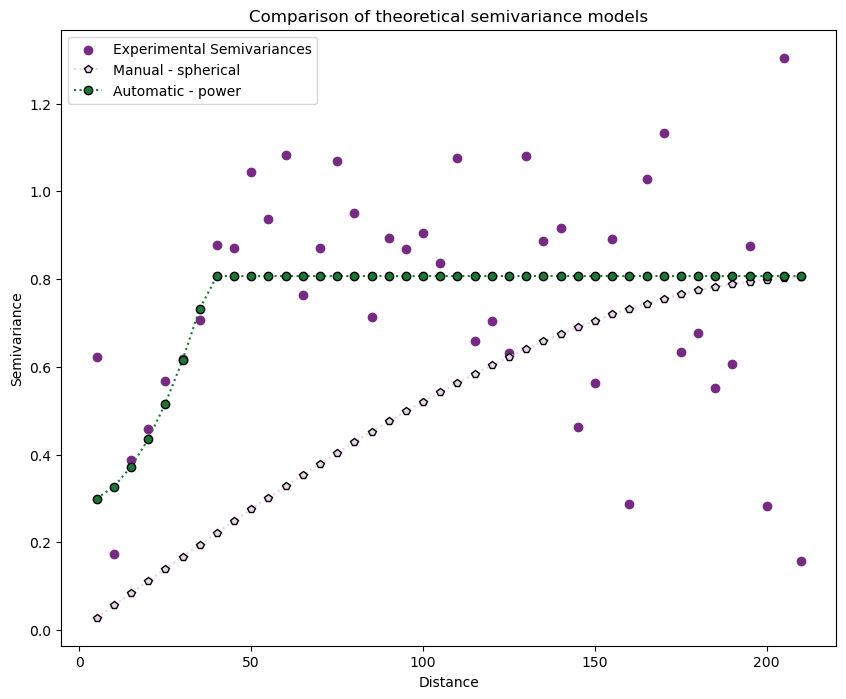

In [36]:
_lags = experimental_variogram.lags
_experimental = experimental_variogram.semivariances
_linear_manual = linear_model.yhat
_spherical_manual = spherical_model.yhat
_automatic = fitted.yhat

plt.figure(figsize=(10, 8))
plt.scatter(_lags, _experimental, color='#762a83')  # Experimental
plt.plot(_lags, _spherical_manual, ':p', color='#e7d4e8', mec='black')
plt.plot(_lags, _automatic, ':o', color='#1b7837', mec='black')

plt.title('Comparison of theoretical semivariance models')
plt.legend(['Experimental Semivariances',
            'Manual - ' + spherical_model.name,
            'Automatic - ' + fitted.name])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

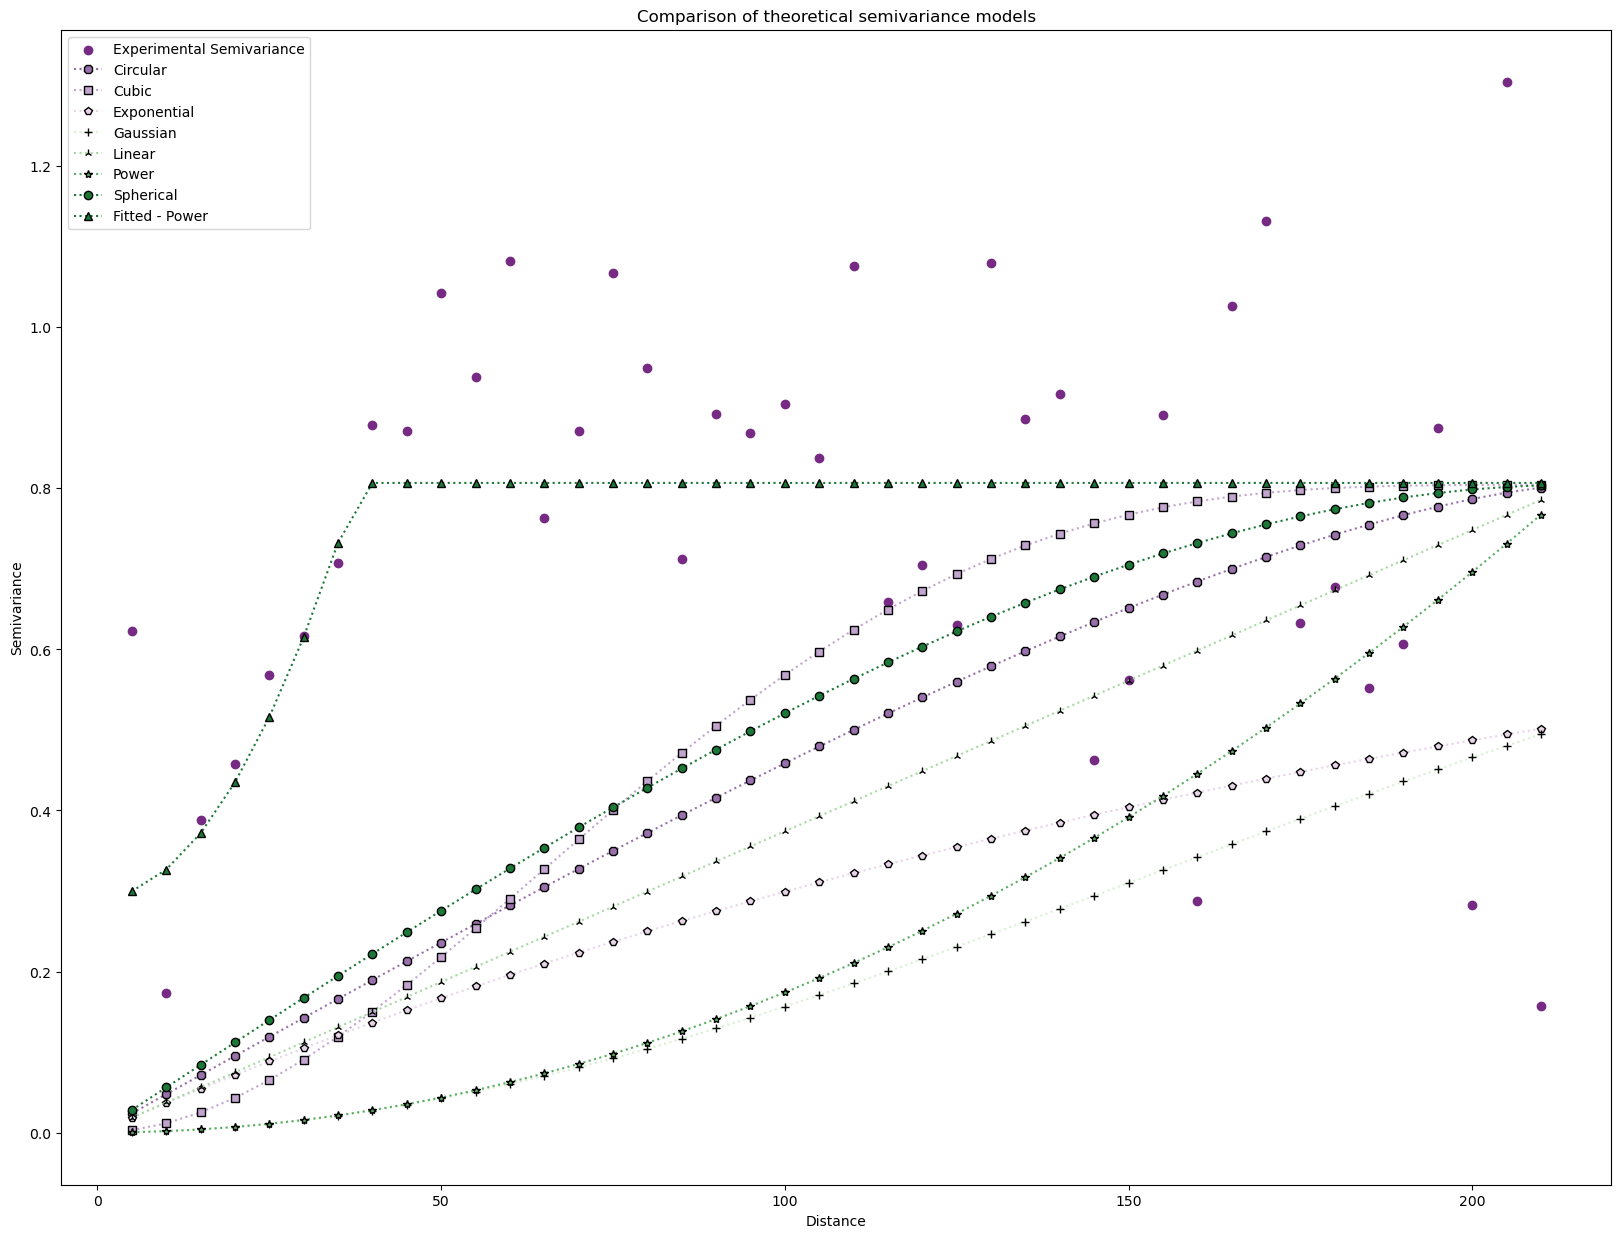

In [70]:
# Plot ALL models

plt.figure(figsize=(20, 15))
plt.scatter(_lags, experimental_variogram.semivariances, color='#762a83')
plt.plot(_lags, circular_model.yhat, ':8', color='#9970ab', mec='black')
plt.plot(_lags, cubic_model.yhat, ':s', color='#c2a5cf', mec='black')
plt.plot(_lags, exponential_model.yhat, ':p', color='#e7d4e8', mec='black')
plt.plot(_lags, gaussian_model.yhat, ':+', color='#d9f0d3', mec='black')
plt.plot(_lags, linear_model.yhat, ':2', color='#a6dba0', mec='black')
plt.plot(_lags, power_model.yhat, ':*', color='#5aae61', mec='black')
plt.plot(_lags, spherical_model.yhat, ':o', color='#1b7837', mec='black')
plt.plot(_lags, _automatic, ':^', color='#1b7837', mec='black')
plt.title('Comparison of theoretical semivariance models')
plt.legend(['Experimental Semivariance',
            'Circular',
            'Cubic',
            'Exponential',
            'Gaussian',
            'Linear',
            'Power',
            'Spherical',
           'Fitted - Power'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()